In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('DATA/Advertising.csv')
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


since simple linear regression is one x for one y, we can combine them x1 x2 x3 into just 1

In [3]:
df['total_spend'] = df['TV']+df['radio']+df['sales']
df.head()

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,290.0
1,44.5,39.3,45.1,10.4,94.2
2,17.2,45.9,69.3,9.3,72.4
3,151.5,41.3,58.5,18.5,211.3
4,180.8,10.8,58.4,12.9,204.5


we can see the more we spend the more we sell

<Axes: xlabel='total_spend', ylabel='sales'>

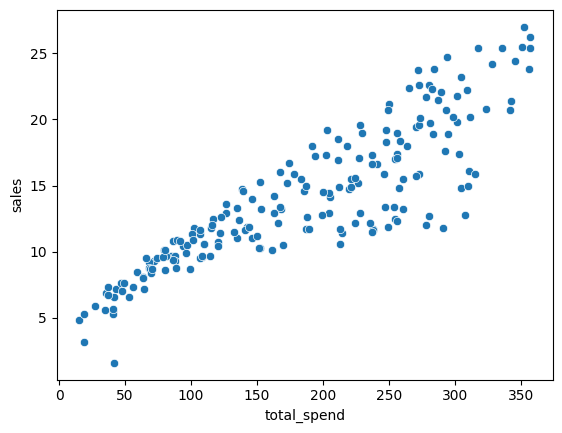

In [4]:
sns.scatterplot(data=df,x='total_spend',y='sales')

separating into features and labels/target

In [5]:
X = df['total_spend']
y = df['sales']

In [6]:
np.polyfit(X,y,deg=1)

#returns our coefficients, array[0] is B1 and array[1] is B0
#for y = B1X + B0

array([0.04939508, 4.91755413])

In [7]:
potential_spend = np.linspace(0,500,100)

In [8]:
predicted_sales = 0.04939508*potential_spend + 4.91755413

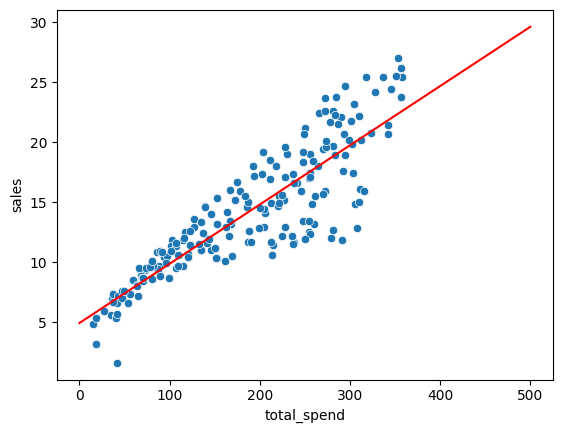

In [9]:
sns.scatterplot(x='total_spend',y='sales',data=df)
plt.plot(potential_spend,predicted_sales,color='red')

In [10]:
np.polyfit(X,y,3)

# gives us
# y = B3x**3 + B2*x**2 + B1x + B0

array([ 9.55670489e-07, -5.18913286e-04,  1.28419064e-01,  1.93066773e+00])

<h1>Scikit-Learn</h1>

In [11]:
df = pd.read_csv('DATA/Advertising.csv')
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


split into features, and label

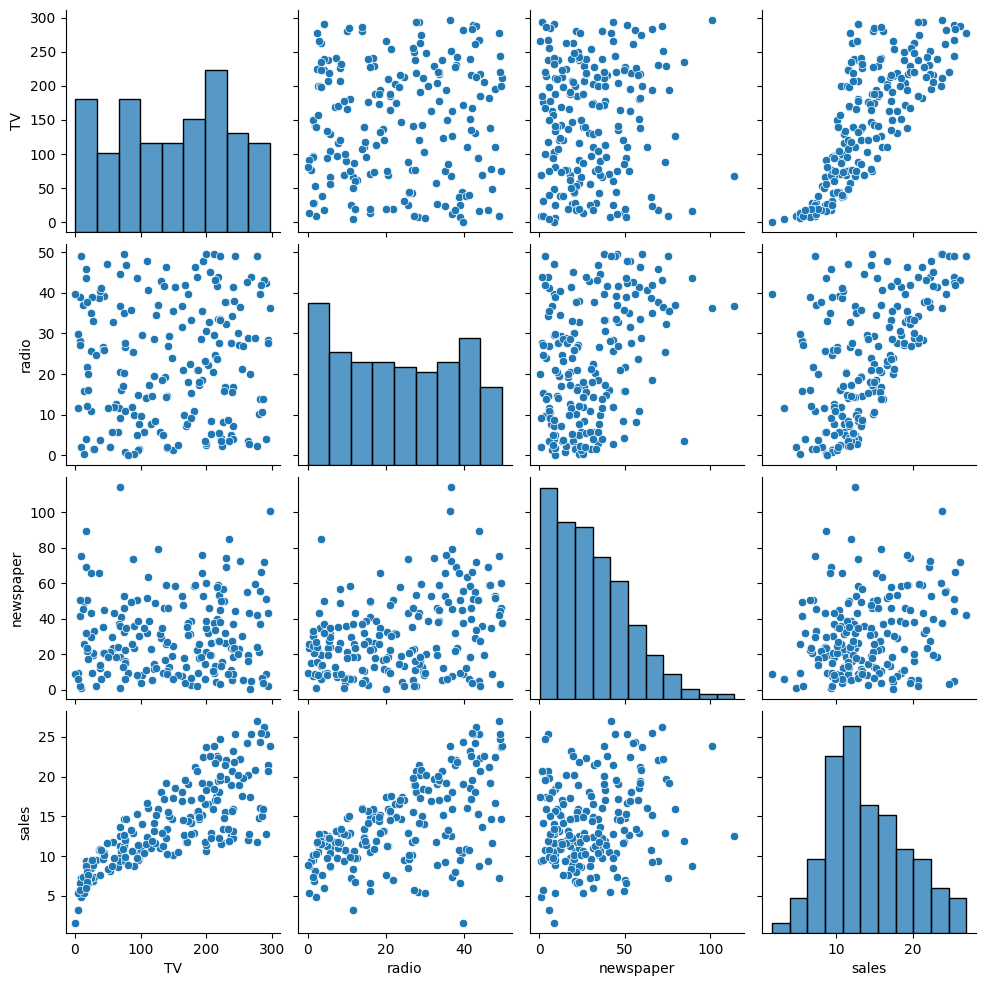

In [12]:
sns.pairplot(df)

In [13]:
X = df.drop('sales',axis=1) #this is a quick way to get only features, since the 'sales' column is the label
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [14]:
y = df['sales'] #it is the label

<h3>Separate Data</h3>

In [15]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\dagui\miniconda3\python.exe -m pip install --upgrade pip' command.


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33,random_state=42)
#test_size asks you what percentage of the data should go to the test
#random_state is similar to random seed | splits in the random state

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
model = LinearRegression()

Training the model with train data

In [20]:
model.fit(X_train,y_train)

LinearRegression()

<h1>Evaluation</h1>

<ul>
    <li>Mean Absolute Error - Easy to Understand, won't punish large errors if the model is off by a few points </li>
    <li>Mean Squared Error - Large errors are punished more than with MAE, this is why MSE is more popular, because unliked MAE, MSE squares the differences between the hat_y and y. Different units than y, since it is y^2 </li>
    <li>Root Mean Square Error - Most popular, it punishes the same way as MSE, but also keeps the units same as y, since we take the root at the end</li>
</ul>

In [21]:
test_predictions = model.predict(X_test) #evaluate on data it has never seen before, and then compare to the y_test

In [22]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [23]:
df['sales'].mean()

14.0225

<Axes: xlabel='sales', ylabel='Count'>

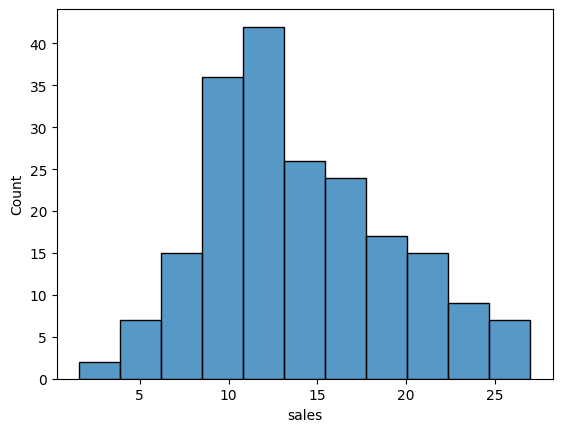

In [24]:
sns.histplot(data=df,x='sales')

In [25]:
mean_absolute_error(y_test,test_predictions)

1.4937750024728969

In [26]:
np.sqrt(mean_squared_error(y_test,test_predictions)) #this is root square error

1.93078438223472

a horrible RMSE but a good MAE means that it is not punishing some big errors

<h3>Residual plot shows the residual error vs. true y_value

In [27]:
test_residuals = y_test-test_predictions
test_residuals #in a perfect model should be 0

95     0.313269
15     1.213775
30    -0.267530
158   -3.510865
128    2.447891
         ...   
97     0.220480
31     0.443402
12    -1.923119
35    -3.800038
119   -0.306115
Name: sales, Length: 66, dtype: float64

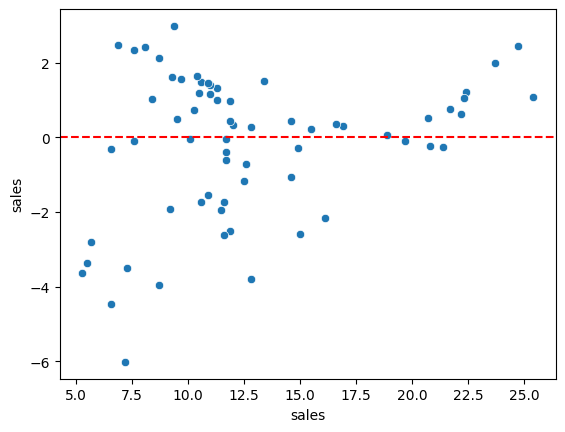

In [28]:
sns.scatterplot(x=y_test,y=test_residuals)
plt.axhline(y=0,color='red',ls='--')

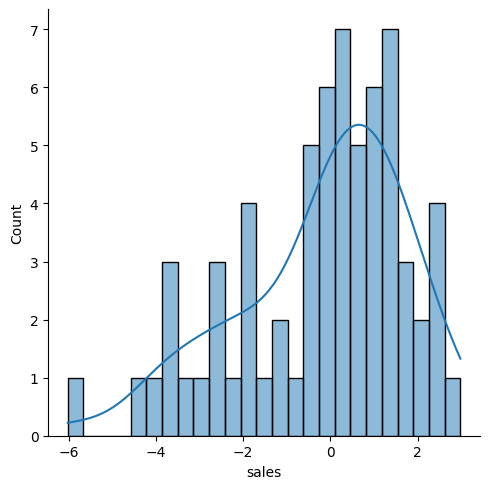

In [29]:
sns.displot(test_residuals,bins=25,kde=True)

<h1>Model Deployment</h1>
<h3>Saving and Loading</h3>

save the hyperparameters that best fit

In [30]:
final_model = LinearRegression()
final_model.fit(X,y)

LinearRegression()

In [31]:
final_model.coef_
#the coefficient matches the coefficient for the features

array([ 0.04576465,  0.18853002, -0.00103749])

In [32]:
X.head() #it shows the coefficient for newspaper is -, meaning that it is meaningless to spend more money on it, and that actually you might get less
#it looks like the coefficient for radio is the biggest, so it means that radio is the most important for sales increase

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


To save a model to the real world

these libraries allow you to save and upload a model

In [33]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\dagui\miniconda3\python.exe -m pip install --upgrade pip' command.


In [34]:
from joblib import dump,load

In [35]:
dump(final_model,'final_sales_model.joblib') #it is a train model file to send to people

['final_sales_model.joblib']

to load model

In [36]:
loaded_model = load('final_sales_model.joblib')

In [37]:
loaded_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

now we can predict specific values with it

In [38]:
campaign = [[149,22,12]] #we do [[]] because of the shape
#if we spend 149 on tv, 22 on radio, and 12 on newspaper we get sales of 13

In [39]:
loaded_model.predict(campaign)

c:\Users\dagui\miniconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.893032])